In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
df = pd.read_csv(r"C:\Users\Zribi Ahmed\Desktop\projectML\train.csv")
pd.set_option('display.max_colwidth', None)

In [2]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative


In [3]:
import pandas as pd


missing_values = df.isna() 

missing_count = missing_values.sum()

total_missing_count = missing_count.sum()

print("Missing Values in Each Column:")
print(missing_count)

print("\nTotal Missing Values in the DataFrame:")
print(total_missing_count)

df['text'].fillna('', inplace=True)
df['selected_text'].fillna('', inplace=True)



Missing Values in Each Column:
textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

Total Missing Values in the DataFrame:
2


In [4]:
temp = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11118
2,positive,8582
0,negative,7781


<AxesSubplot:xlabel='sentiment', ylabel='count'>

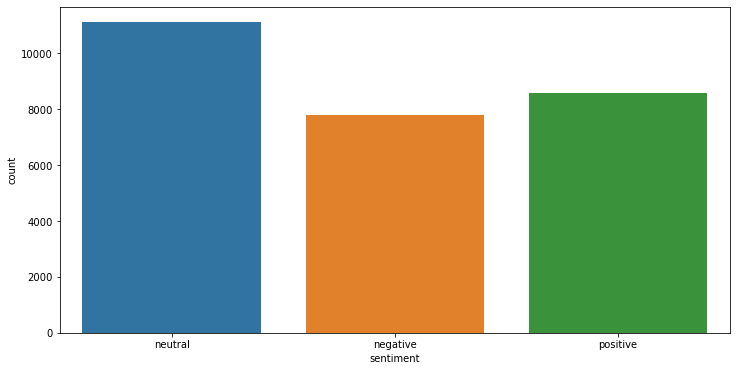

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

In [6]:
df.shape

(27481, 4)

In [7]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def clean_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Lowercasing
    lowercased_text = text.lower()

    # Removing punctuation
    text_without_punctuation = "".join([char for char in text if char not in string.punctuation])

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in tokens]

    return lemmatized_text  # You can return any cleaned version you prefer

# Apply the cleaning function to the 'text_column'
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the DataFrame with cleaned text
#print(df)


In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def classify_sentiment(text):
    # Initialize sentiment scores
    compound_score = 0

    # Check for specific words and classify as 'negative' if found
    negative_words = ['*']  # Add your list of negative words
    for word in negative_words:
        if word in text:
            return 'negative'

    # Calculate sentiment scores for each word and aggregate them
    for word in text:
        sentiment = sia.polarity_scores(word)
        compound_score += sentiment['compound']

    # Determine sentiment class based on the aggregate compound score
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis function to the 'cleaned_data' column
tqdm.pandas()  # Enable progress bar with tqdm
df['sent'] = df['cleaned_text'].progress_apply(classify_sentiment)

# Display the DataFrame with sentiment classification
#print(df)




  0%|          | 0/27481 [00:00<?, ?it/s]

In [9]:
df.head()

,textID,text,selected_text,sentiment,cleaned_text,sent
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San, Diego, !, !, !]",negative
2,088c60f138,my boss is bullying me...,bullying me,negative,"[my, bos, is, bullying, me, ...]",negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[what, interview, !, leave, me, alone]",negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, they, put, them, on, the, release, we, already, bought]",negative


In [10]:
# Assuming you have a DataFrame df with 'sentiment' and 'sent' columns

# Count the matching rows using pandas
matching_rows = df[df['sentiment'] == df['sent']]
count = len(matching_rows)

print("Accuracy using VADER Seniment Scoring:",count/df.shape[0])


Accuracy using VADER Seniment Scoring: 0.6187547760270733


In [11]:
matching_neutral_rows = df[(df['sentiment'] == 'neutral') & (df['sent'] == 'neutral')]
count_matching_neutral = len(matching_neutral_rows)
neutral = df[df['sentiment'] == 'neutral']
n_neutral=len(neutral)
print("accuracy rows with sentiment 'neutral':", count_matching_neutral/n_neutral)
matching_positive_rows = df[(df['sentiment'] == 'positive') & (df['sent'] == 'positive')]
count_matching_positive = len(matching_positive_rows)
positive = df[df['sentiment'] == 'positive']
n_positive=len(positive)
print("accuracy rows with sentiment 'positive':", count_matching_positive/n_positive)
matching_negative_rows = df[(df['sentiment'] == 'negative') & (df['sent'] == 'negative')]
count_matching_negative = len(matching_negative_rows)
negative = df[df['sentiment'] == 'negative']
n_negative=len(negative)
print("accuracy rows with sentiment 'negative':", count_matching_negative/n_negative)

accuracy rows with sentiment 'neutral': 0.44702284583558194
accuracy rows with sentiment 'positive': 0.8465392682358425
accuracy rows with sentiment 'negative': 0.6129032258064516


In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on the highest sentiment score
def classify_sentiment(word_list):
    text = ' '.join(word_list)  # Convert the list of words to a single string
    sentiment_scores = sia.polarity_scores(text)

    # Check for specific words and classify as 'negative' if found
    negative_words = ['*']  # Add your list of negative words
    for word in negative_words:
        if word in text:
            return 'negative'

    # Determine the sentiment class based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis function to the 'cleaned_data' column
tqdm.pandas()  # Enable progress bar with tqdm
df['sent'] = df['cleaned_text'].progress_apply(classify_sentiment)

# Display the DataFrame with sentiment classification
#print(df)






  0%|          | 0/27481 [00:00<?, ?it/s]

In [23]:
df.head()

,textID,text,selected_text,sentiment,cleaned_text,sent
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San, Diego, !, !, !]",negative
2,088c60f138,my boss is bullying me...,bullying me,negative,"[my, bos, is, bullying, me, ...]",negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[what, interview, !, leave, me, alone]",negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, they, put, them, on, the, release, we, already, bought]",negative


In [24]:
# Assuming you have a DataFrame df with 'sentiment' and 'sent' columns

# Count the matching rows using pandas
matching_rows = df[df['sentiment'] == df['sent']]
count = len(matching_rows)

print("Accuracy using updated VADER Seniment Scoring:",count/df.shape[0])


Accuracy using updated VADER Seniment Scoring: 0.62661475201048


In [25]:
matching_neutral_rows = df[(df['sentiment'] == 'neutral') & (df['sent'] == 'neutral')]
count_matching_neutral = len(matching_neutral_rows)
neutral = df[df['sentiment'] == 'neutral']
n_neutral=len(neutral)
print("accuracy rows with sentiment 'neutral':", count_matching_neutral/n_neutral)
matching_positive_rows = df[(df['sentiment'] == 'positive') & (df['sent'] == 'positive')]
count_matching_positive = len(matching_positive_rows)
positive = df[df['sentiment'] == 'positive']
n_positive=len(positive)
print("accuracy rows with sentiment 'positive':", count_matching_positive/n_positive)
matching_negative_rows = df[(df['sentiment'] == 'negative') & (df['sent'] == 'negative')]
count_matching_negative = len(matching_negative_rows)
negative = df[df['sentiment'] == 'negative']
n_negative=len(negative)
print("accuracy rows with sentiment 'negative':", count_matching_negative/n_negative)

accuracy rows with sentiment 'neutral': 0.43883792048929665
accuracy rows with sentiment 'positive': 0.8506175716616173
accuracy rows with sentiment 'negative': 0.6478601722143683


In [31]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd
import torch
import numpy as np

# Define the DistilBERT-based model
MODEL = "distilbert-base-uncased"

# Load the DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Load the DistilBERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Function to classify sentiment using DistilBERT
def classify_sentiment(texts):
    text_strings = [' '.join(text) for text in texts]  # Convert the list of words to a list of single strings
    inputs = tokenizer(text_strings, padding=True, truncation=True, max_length=128, return_tensors='pt', is_split_into_words=True)
    outputs = model(**inputs)
    logits = outputs.logits
    probs = softmax(logits.detach().numpy(), axis=1)
    
    # Determine the sentiment class based on the highest probability
    sentiments = [np.argmax(probs, axis=1) for probs in probs]

    return sentiments

# Apply the sentiment analysis function to the 'cleaned_text' column
sentiments = classify_sentiment(df['cleaned_text'])

# Map the sentiment indices to the categories
sentiment_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
sentiments = [sentiment_map[sentiment[0]] for sentiment in sentiments]

# Ensure that the number of sentiments matches the number of rows in df
if len(sentiments) != len(df):
    print(f"Warning: Length of sentiments ({len(sentiments)}) does not match length of the DataFrame ({len(df)}).")

# Assign sentiments to the DataFrame
df['sent'] = sentiments

# Display the DataFrame with sentiment classification
#print(df)



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AxisError: axis 1 is out of bounds for array of dimension 1

In [19]:
df.head()

,textID,text,selected_text,sentiment,cleaned_text,sent
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San, Diego, !, !, !]",negative
2,088c60f138,my boss is bullying me...,bullying me,negative,"[my, bos, is, bullying, me, ...]",negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[what, interview, !, leave, me, alone]",negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, they, put, them, on, the, release, we, already, bought]",neutral
